In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [29]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
cat = data.select_dtypes(exclude= 'number')
num = data.select_dtypes(include = 'number')
print(f'Categorical Variables')
display(cat.head())
print(f'\nNumerical Variables')
display(num.head())

Categorical Variables


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest



Numerical Variables


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


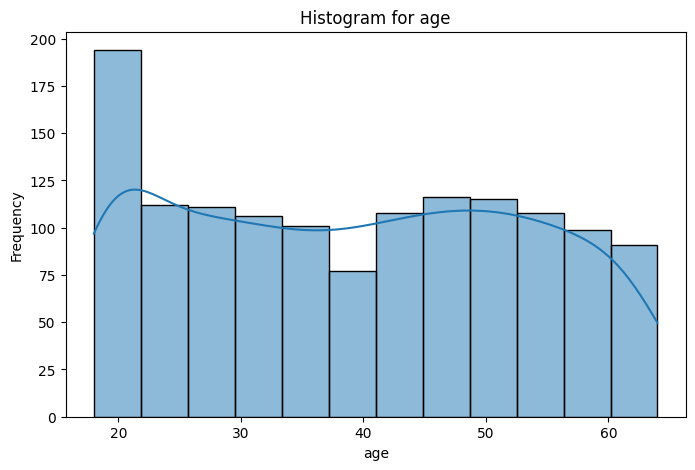

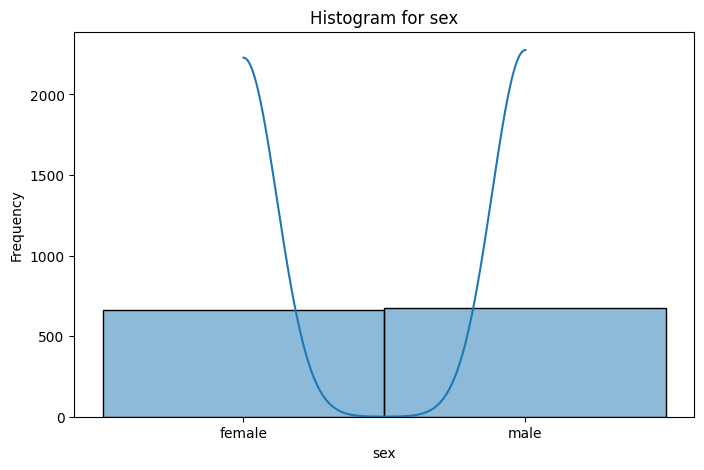

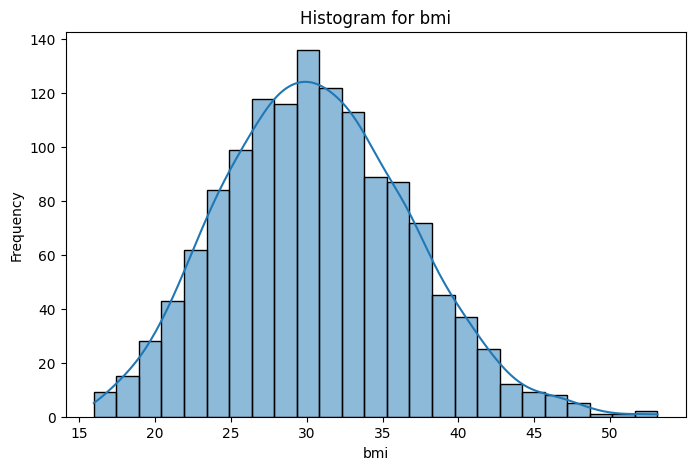

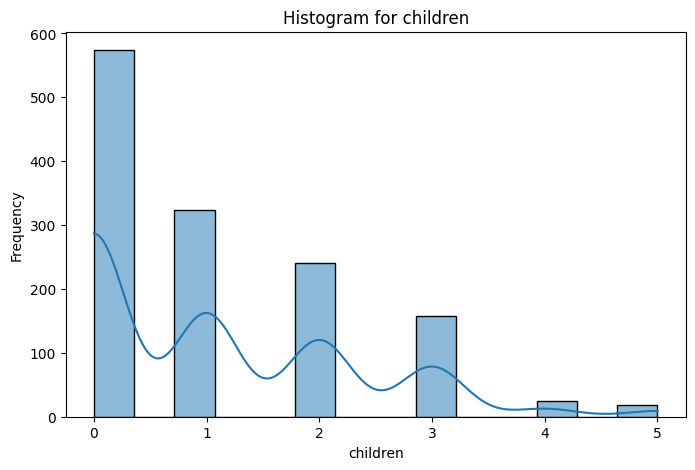

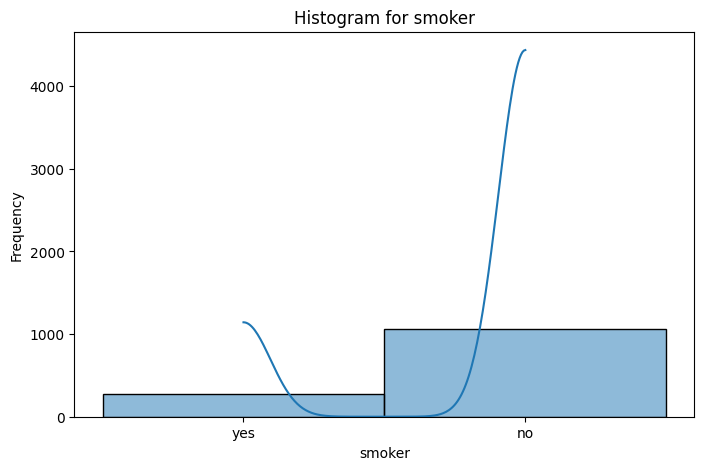

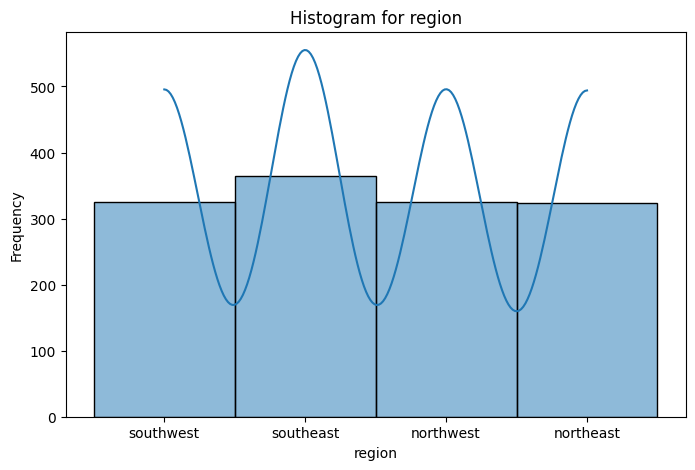

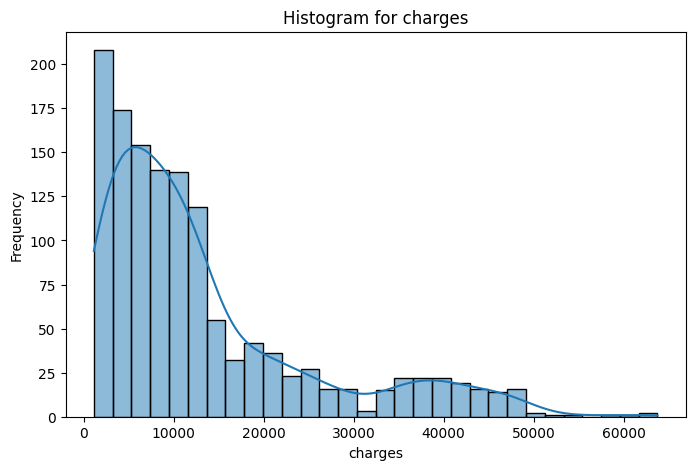

In [31]:
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

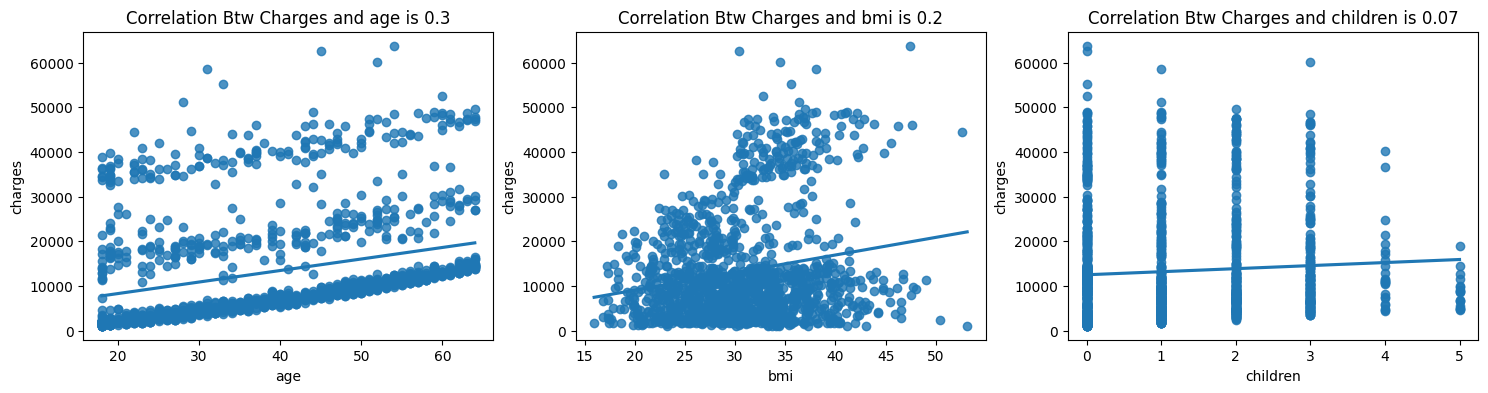

In [32]:
def plotter(data, a, b, c, dependent):
    plt.figure(figsize = (18, 4))

    plt.subplot(1, 3, 1)
    sns.regplot(y = data[dependent], x = data[a], ci = 0)
    plt.title(f"Correlation Btw Charges and {a} is {(data[dependent].corr(data[a]).round(2))}")

    plt.subplot(1, 3, 2)
    sns.regplot(y = data[dependent], x = data[b], ci = 0)
    plt.title(f"Correlation Btw Charges and {b} is {(data[dependent].corr(data[b]).round(2))}")

    plt.subplot(1, 3, 3)
    sns.regplot(y = data[dependent], x = data[c], ci = 0)
    plt.title(f"Correlation Btw Charges and {c} is {(data[dependent].corr(data[c]).round(2))}")


plotter (data, 'age', 'bmi', 'children', 'charges')



In [33]:
#Multicolinearity
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')

ValueError: could not convert string to float: 'female'

In [38]:
new_data = data.copy()

In [ ]:
new_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [39]:
#  TRAIN AND TEST SPLIT

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Encode the categorical data set
for i in cat:
    if i in new_data.columns:
        new_data[i] = encoder.fit_transform(new_data[i])

x = new_data.drop('charges', axis = 1)
y = new_data.charges

xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 10)
print(f'Xtrain: {xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')

Xtrain: (1070, 6)
ytrain: (1070,)
Xtest: (268, 6)
ytest: (268,)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model =  RandomForestRegressor(n_estimators=100, random_state=42)# ---------------------------------------- instantiate the algorithm
model.fit(xtrain, ytrain) # ----------------------------------------- Fit the algorithm on the model

# # checking for underfitting
# cross_validation = model.predict(xtrain)
# print(f'Cross Validation Score: {r2_score(cross_validation, ytrain)}')

# Predict on the testing data
y_pred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 26608138.457123272
R^2 Score: 0.8102815966001731


In [34]:
import pickle, joblib
pickle.dump(model, open('Insurance.pkl', "wb"))